In [9]:
#importing libraries
import numpy as np
import pandas as pd
import lightgbm as lgb
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from lightgbm import plot_importance
from datetime import datetime
%matplotlib inline

In [10]:
# load data
train = pd.read_csv("./train.csv", index_col=0)
test = pd.read_csv("./test.csv", index_col=0)
submission = pd.read_csv("./sample_submission.csv")

In [11]:
train = train.dropna()
train = train.drop(train[train['dered_g']==-9999].index)
train = train.drop(train[train['dered_i']==-9999].index)
train = train.drop(train[train['dered_z']==-9999].index)

In [12]:
train['u-g'] = train['u'] - train['g']
train['g-r'] = train['g'] - train['r']
train['r-i'] = train['r'] - train['i']
train['i-z'] = train['i'] - train['z']
train['dered_u-g'] = train['dered_u'] - train['dered_g']
train['dered_g-r'] = train['dered_g'] - train['dered_r']
train['dered_r-i'] = train['dered_r'] - train['dered_i']
train['dered_i-z'] = train['dered_i'] - train['dered_z']
train['airmass_u-g'] = train['airmass_u'] - train['airmass_g']
train['airmass_g-r'] = train['airmass_g'] - train['airmass_r']
train['airmass_r-i'] = train['airmass_r'] - train['airmass_i']
train['airmass_i-z'] = train['airmass_i'] - train['airmass_z']

test['u-g'] = test['u'] - test['g']
test['g-r'] = test['g'] - test['r']
test['r-i'] = test['r'] - test['i']
test['i-z'] = test['i'] - test['z']
test['dered_u-g'] = test['dered_u'] - test['dered_g']
test['dered_g-r'] = test['dered_g'] - test['dered_r']
test['dered_r-i'] = test['dered_r'] - test['dered_i']
test['dered_i-z'] = test['dered_i'] - test['dered_z']
test['airmass_u-g'] = test['airmass_u'] - test['airmass_g']
test['airmass_g-r'] = test['airmass_g'] - test['airmass_r']
test['airmass_r-i'] = test['airmass_r'] - test['airmass_i']
test['airmass_i-z'] = test['airmass_i'] - test['airmass_z']

In [13]:
airmass = train[['airmass_u', 'airmass_g', 'airmass_r', 'airmass_i', 'airmass_z']]
train["airmass"] = airmass.median(axis = 1)

airmass = test[['airmass_u', 'airmass_g', 'airmass_r', 'airmass_i', 'airmass_z']]
test["airmass"] = airmass.median(axis = 1)

In [14]:
# n값 처리
train['nO-nD'] = train['nObserve'] - train['nDetect']
test['nO-nD'] = test['nObserve'] - test['nDetect']

In [15]:
train = train.drop(['nObserve', 'nDetect'], axis=1)
train = train.drop(['airmass_u', 'airmass_g', 'airmass_r', 'airmass_i', 'airmass_z'], axis=1)
# train = train.drop(['u', 'g', 'r', 'i', 'z'], axis=1)

test = test.drop(['nObserve', 'nDetect'], axis=1)
test = test.drop(['airmass_u', 'airmass_g', 'airmass_r', 'airmass_i', 'airmass_z'], axis=1)
# test = test.drop(['u', 'g', 'r', 'i', 'z'], axis=1)

In [16]:
# split data into X and y

Y = train['class']
del train['class']
X = train

In [17]:
#train-test-split
X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size=0.25, random_state=0)
d_train = lgb.Dataset(X_train, label=y_train)
eval_set = [(X_test, y_test)]

In [18]:
start_time = datetime.now()

#setting up the parameters
params={}
params['learning_rate']=0.1
params['boosting_type']='gbdt'
params['objective']='multiclass'
params['metric']='multi_logloss'
params['num_class']=3
params['max_depth']=10
params['num_estimators']=1000
params['eval_set']=eval_set
early_stopping_rounds=20

#training the model
model = lgb.train(params,d_train,1000)
y_pred = model.predict(X_test)

end_time = datetime.now() 
print("\nelapsed time = ", end_time - start_time)


elapsed time =  0:00:53.974405


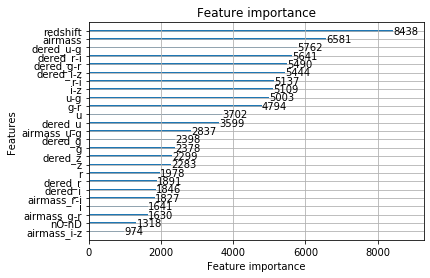

In [19]:
# rcParams['figure.figsize'] = 10, 60
plot_importance(model)

In [20]:
#argmax() method 
y_pred = [np.argmax(line) for line in y_pred]

In [21]:
accuracy_score(y_test, y_pred)

0.933324166552082

In [22]:
# # 파일생성
# pred = model.predict(test)
# pred = [np.argmax(line) for line in pred]
# submission['class'] = pred
# submission.to_csv("submission_lgb.csv",index=False, encoding='utf-8-sig')